## Using the IUVS Package

The IUVS instrument has its own [Python package](https://github.com/lasp/maven_iuvs) for reading in files

In [103]:
import maven_iuvs.download as dnld
import maven_iuvs.search as search
from astropy.io import fits
import matplotlib.pyplot as plt
import glob

In [ ]:
import os, sys
sys.path.append('maven_iuvs')

dnld.get_euvm_l2b_dir()

In [111]:
### READ IN FILES WITH ASTROPY FITS
files = glob.glob(os.path.join(os.path.realpath(os.path.join('limb_derived_2022', 'l2/limb/2022/01')), "*.fits"), recursive=True)

hdul = fits.open(files[5]) ### READ IN FIRST FITS FILE

### PRINT OUT FILE INFO
print(hdul.info())

Filename: /Users/tamarervin/orestis-maven/limb_derived_2022/l2/limb/2022/01/mvn_iuv_l2_periapse-orbit15541_20220107T092059_v13_r01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  SPECIES       1 BinTableHDU     21   3R x 1C   [3A]   
  2  DENSITY       1 BinTableHDU     40   14R x 4C   [57E, 57E, 57E, 57E]   
  3  TEMPERATURE    1 BinTableHDU     38   14R x 7C   [E, E, E, 19E, 19E, 19E, 19E]   
  4  GEOMETRY_RETRIEVAL    1 BinTableHDU     70   14R x 11C   [D, D, D, D, D, D, D, D, D, D, D]   
  5  EMISSION_FEATURES    1 BinTableHDU     34   29R x 4C   [18A, 256D, E, E]   
  6  MODEL_RADIANCE    1 BinTableHDU     45   14R x 6C   [37A, E, 29E, 1885E, 1885E, 1885E]   
  7  GEOMETRY_RADIANCE    1 BinTableHDU     75   14R x 12C   [65D, 65D, 65D, 65D, 65D, 65D, 65D, 65D, 65D, 65D, 65D, 65D]   
  8  OBSERVATION    1 BinTableHDU     63   1R x 13C   [59A, 4A, 7A, 21A, 21A, 33A, I, 5A, 4A, I, I, E, 60A]   
None


In [112]:
### SPECIES DATA
print(hdul[1].data['ID']) ## species information

['CO2' 'N2' 'O']


In [113]:
### ALTITUDE DATA -- km
CO2_altitudes = hdul[2].data['ALT'][0][:, 0]
N2_altitudes = hdul[2].data['ALT'][0][:, 1]
O_altitudes = hdul[2].data['ALT'][0][:, 2]

### DENSITY DATA -- cm^{-3}
CO2_density = hdul[2].data['PROFILE'][0][:, 0]
N2_density = hdul[2].data['PROFILE'][0][:, 1]
O_density = hdul[2].data['PROFILE'][0][:, 2]

Text(0, 0.5, 'Altitude [km]')

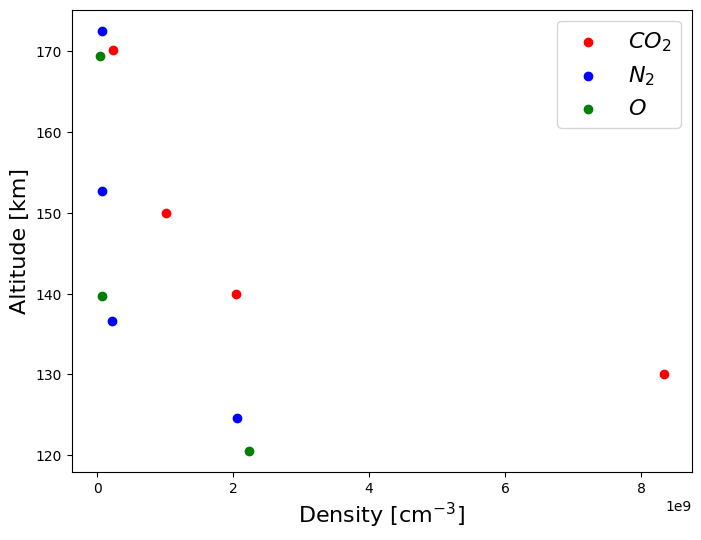

In [114]:
fig = plt.figure(figsize=[8, 6])
plt.scatter(CO2_density, CO2_altitudes, color='red', label='$CO_2$') 
plt.scatter(N2_density, N2_altitudes, color='blue', label='$N_2$')
plt.scatter(O_density, O_altitudes, color='green', label='$O$')
plt.legend(loc='upper right', fontsize=16)
plt.xlabel('Density [cm$^{-3}$]', fontsize=16)
plt.ylabel('Altitude [km]', fontsize=16)

In [117]:
### TEMPERATURE DATA
temperature = hdul[3].data['PROFILE'] ## temperature in Kelvin
temperature_altitudes = hdul[3].data['ALT'] ## altitude of temperature

### PLOT TEMPERATURE PROFILE 